In [ ]:
#@title ## Big Data Lab  - Assignment 4  - Linear Regression
#@markdown ### Instructions
#@markdown 1. The purpose of this assignment is to cover the built and use of a linear regression model.  
#@markdown  
#@markdown 2. You can choose to complete the assignment on your own or to colaborate with a partner. You are welcome to discuss your work with your fellow students but to maintain a healthy learning process - please keep all final answers to yourself! 
#@markdown 3. Complete the answers in the empty cells - Feel free to add as many extra cell as you require.
#@markdown 4. Fill in your name and select the Year and Department.
#@markdown 5. When done - Download the colab notebook by going to 'File -> Download .ipynb' and submit the file in the course's moodle page before the due date. 
 
#@markdown ---
#@markdown ### Enter your information:
Student1_Full_Name = "Adam Vos" #@param {type:"string"}
Student2_Full_Name = "Kfir Gisman" #@param {type:"string"}
Depatment = "Computer Science" #@param ["Select","Computer Science", "Industrial Engineering", "Economics and Management"]
Year = "Second" #@param ["Select","Second", "Third", "Fourth"]

#@markdown ---


##In this assignment you are requested to predict the price of a vehicle given it's features.


1. Import the necessary libraries

In [ ]:
import pandas as pd #for dataframe manipulations
import numpy as np # for linear algebra operations
import plotly.graph_objects as go # for visualization
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt

2. Create a dataframe from the following link. Name it "cars_df".
>'https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/cars.csv'

In [ ]:
cars_df = pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/cars.csv')

><h3>DataSet Information:</h3>						
						
1.	Car_ID:			Unique id of each observation (Interger)		
2.	Symboling:			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3.	carCompany:			Name of car company (Categorical)		
4.	fueltype:			Car fuel type i.e gas or diesel (Categorical)		
5.	aspiration:			Aspiration used in a car (Categorical)		
6.	doornumber:			Number of doors in a car (Categorical)		
7.	carbody:			body of car (Categorical)		
8.	drivewheel:			type of drive wheel (Categorical)		
9.	enginelocation:			Location of car engine (Categorical)		
10.	wheelbase:			Weelbase of car (Numeric)		
11.	carlength:			Length of car (Numeric)		
12.	carwidth:			Width of car (Numeric)		
13.	carheight:			height of car (Numeric)		
14.	curbweight:			The weight of a car without occupants or baggage. (Numeric)		
15.	enginetype:			Type of engine. (Categorical)		
16.	cylindernumber:			cylinder placed in the car (Categorical)		
17.	enginesize:			Size of car (Numeric)		
18.	fuelsystem:			Fuel system of car (Categorical)		
19.	boreratio:			Boreratio of car (Numeric)		
20.	stroke:			Stroke or volume inside the engine (Numeric)		
21.	compressionratio:			compression ratio of car (Numeric)		
22.	horsepower:			Horsepower (Numeric)		
23.	peakrpm:			car peak rpm (Numeric)		
24.	citympg:			Mileage in city (Numeric)		
25.	highwaympg:			Mileage on highway (Numeric)		
26.	price(Dependent variable):			Price of car (Numeric)		

3. Print the head and info of the dataframe

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#cars_df.head
cars_df['enginesize']

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

4. What is the dataframe's shape?

In [ ]:
cars_df.shape

(205, 26)

##Data preparation

5. Is there missing data in the DF?






In [ ]:
cars_df.isna().any().sum()


0

6. Remove all zero variance or unnecessary features.

In [ ]:
cars_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

7. Convert all categorical features with 2 unique string values to binary features. 

>For example:

>>'doornumber' column name should be converted to 'is_four_door' and the values to 1 or 0. 

In [ ]:
cars_df['is_gas'] = np.multiply(cars_df['fueltype'] == 'gas', 1) 
cars_df['is_turbo'] = np.multiply(cars_df['aspiration'] == 'turbo', 1) 
cars_df['is_four_door'] = np.multiply(cars_df['doornumber'] == 'four', 1) 
cars_df['is_front_engine'] = np.multiply(cars_df['enginelocation'] == 'front', 1) 
cars_df.drop(['fueltype','aspiration', 'doornumber' ,'enginelocation','car_ID', 'symboling', 'CarName' ], axis=1, inplace=True)

In [ ]:
cars_df.columns == [ 'carbody', 'drivewheel',
        'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price','is_gas', 'is_turbo', 'is_four_door','is_front_engine']
     

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
cars_df

,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,is_gas,is_turbo,is_four_door,is_front_engine
0,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,1
1,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,1
2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1
3,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,1,1
4,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,sedan,rwd,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0,1,1
201,sedan,rwd,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,1,1,1,1
202,sedan,rwd,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0,1,1
203,sedan,rwd,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0,1,1,1


8. Convert the cylindernumber feature from string to numerical values. Also, change the price column to show the price in thousands. (example 12345 becomes 12.345)


---



In [ ]:
def word2int(word):
      return ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight","nine", "ten", "eleven", "twelve"].index(word)
cars_df['cylindernumber'] = cars_df['cylindernumber'].apply(word2int)
cars_df['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [ ]:
cars_df['priceK'] = cars_df['price'].apply(lambda x: x/1000)
cars_df.drop(['price'], axis=1, inplace=True)

In [ ]:

cars_df.head()

,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,is_gas,is_turbo,is_four_door,is_front_engine,priceK
0,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1,0,0,1,13.495
1,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,1,0,0,1,16.500
2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,1,0,0,1,16.500
3,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,1,0,1,1,13.950
4,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,1,0,1,1,17.450


9. Drop all non-numeric categorical features ('carbody','drivewheel','enginetype','fuelsystem') 

In [ ]:
cars_df.drop(['carbody','drivewheel', 'enginetype', 'fuelsystem'], axis=1, inplace=True)

In [ ]:
cars_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,is_gas,is_turbo,is_four_door,is_front_engine,priceK
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,1,0,0,1,13.495
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,1,0,0,1,16.500
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,1,0,0,1,16.500
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,1,0,1,1,13.950
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,1,0,1,1,17.450


10. Show a correlation matrix of the remaining features and plot the correlation heatmap.

In [ ]:
pd.set_option("display.precision", 3)
corr_df = cars_df.corr()

In [ ]:
fig = go.Figure(data=go.Heatmap(x=corr_df.columns,y=corr_df.columns,z=corr_df))
fig.show()

11. Find features that highly correlate(+/- 0.85) to each other - keep one feature and drop the rest. 

In [ ]:
cars_df.drop(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'is_gas', 'is_turbo', 'is_four_door', 'is_front_engine', 'priceK'], axis=1)

,citympg,highwaympg
0,21,27
1,21,27
2,19,26
3,24,30
4,18,22
...,...,...
200,23,28
201,19,25
202,18,23
203,26,27


12. Feature selection - Find features that highly correlate to the target(price) - keep them and drop the rest. (-0.66 > high correlation > 0.66) 

In [ ]:
cars_df.drop(['wheelbase', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'is_gas', 'is_turbo', 'is_four_door', 'is_front_engine'], axis=1,inplace=True)
cars_df

,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,priceK
0,168.8,64.1,2548,4,130,111,21,27,13.495
1,168.8,64.1,2548,4,130,111,21,27,16.500
2,171.2,65.5,2823,6,152,154,19,26,16.500
3,176.6,66.2,2337,4,109,102,24,30,13.950
4,176.6,66.4,2824,5,136,115,18,22,17.450
...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,4,141,114,23,28,16.845
201,188.8,68.8,3049,4,141,160,19,25,19.045
202,188.8,68.9,3012,6,173,134,18,23,21.485
203,188.8,68.9,3217,6,145,106,26,27,22.470


13. EDA plot a side by side bar chart of the mean price and mean enginesize for each number of cylinders

In [ ]:
cylinders_df=cars_df[['priceK','enginesize','cylindernumber']].groupby(by=['cylindernumber']).mean()
cylinders_df

,priceK,enginesize
cylindernumber,,
2,13.020,72.500
3,5.151,61.000
4,10.286,112.799
5,21.630,152.182
6,23.672,185.292
8,37.400,256.600
12,36.000,326.000


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='enginesize', x=cylinders_df.index, y=cylinders_df['enginesize'], marker_color='blue'))
fig.add_trace(go.Bar(name='priceK', x=cylinders_df.index, y=cylinders_df['priceK'], marker_color='green'))
fig.update_layout(
    barmode='group',
    title='Price and Engine-size by number of cylinders', 
    xaxis_title='Number of cylinders')
fig.show()

14. Set the X and y and divide the DF to train and test dataframes 

In [ ]:
cars_df

,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,priceK
0,168.8,64.1,2548,4,130,111,21,27,13.495
1,168.8,64.1,2548,4,130,111,21,27,16.500
2,171.2,65.5,2823,6,152,154,19,26,16.500
3,176.6,66.2,2337,4,109,102,24,30,13.950
4,176.6,66.4,2824,5,136,115,18,22,17.450
...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,4,141,114,23,28,16.845
201,188.8,68.8,3049,4,141,160,19,25,19.045
202,188.8,68.9,3012,6,173,134,18,23,21.485
203,188.8,68.9,3217,6,145,106,26,27,22.470


In [ ]:

from sklearn.model_selection import train_test_split
X=cars_df[['enginesize','highwaympg', 'carlength', 'curbweight','horsepower','cylindernumber']]
y=cars_df['priceK']

X_train, X_test, y_train, y_test = train_test_split(X, y)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)

print(test_df.shape)
print(train_df.shape)



(52, 7)
(153, 7)


15. Standard scale the 4 subsets seperately


In [ ]:
from sklearn.preprocessing import StandardScaler

x_train_scaler = StandardScaler()
x_test_scaler  = StandardScaler()
y_train_scaler = StandardScaler()
y_test_scaler  = StandardScaler()
X_train_scaled = x_train_scaler.fit_transform(X_train.values).transpose()
X_test_scaled  = x_test_scaler.fit_transform(X_test)
y_train_scaled = y_train_scaler.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test_scaled  = y_test_scaler.fit_transform(np.asarray(y_test).reshape(-1, 1))

16. For the **scaled** training set only - Plot a scatter graph for each of the independent variable by the dependent price variable

In [ ]:
y_train_scaled[:, 0]

array([-0.72671699, -0.61775515,  0.36717682,  1.26098151,  0.2073987 ,
       -0.8376333 ,  0.37597195,  0.04859781,  0.26847596,  0.23915887,
        0.10344519, -0.68347429,  0.40223517,  3.3913565 , -0.56229699,
       -0.57500106,  2.84960116, -0.68347429, -0.43525628, -0.99716712,
       -0.34864872,  0.7508642 , -0.56626701, -0.63449032,  0.36192418,
       -0.76434058, -0.7027747 , -0.80171987,  2.20462525, -0.51966506,
       -0.76385197, -0.56571732,  0.40895367, -0.77618957, -0.85791095,
        0.56164683,  3.89035775,  0.59462855,  0.65937045, -0.65440151,
       -0.75212513, -0.83799976, -0.58318542,  2.6267913 , -0.31847655,
       -0.89944349,  0.44547787, -0.23907611,  0.24770969,  0.18174625,
       -0.88649511, -0.2874493 ,  0.50789884, -0.67834379, -0.56571732,
       -0.40972599, -0.52760511, -0.43452335, -0.56626701, -0.61726653,
       -0.81808858,  0.59206331, -0.76434058, -0.48900427, -0.83799976,
       -0.97481284,  3.34799164, -1.02086509,  0.0376039 ,  1.03

In [ ]:
from plotly.subplots import make_subplots
rows = 2
cols = 3
c = ['blue', 'green', 'brown', 'red', 'orange', 'magenta','black', 'yellow']
fig = make_subplots(rows=rows, cols=cols, shared_yaxes=True, )
count=0
for i in range(rows):
  for j in range(cols):
    if count < len(X_train.columns):
      fig.add_trace(go.Scatter(
        y=y_train_scaled.reshape(1, -1)[0],
        x=X_train_scaled[count],
        mode='markers',
        marker_color=c[count],
        marker_size=2.5,
        name=X.columns[count]
        ),row=i+1, col=j+1
      )
      fig.update_xaxes(title_text=X_train.columns[count], row=i+1, col=j+1)
    count+=1

fig.update_layout(height=900, width=1200,
                  title_text="Price by features")
fig.show()

17. Plot the outliers  - use the scaled training set.

In [ ]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(X_train.columns))]
fig = go.Figure()
fig.add_traces(
    data=[
        go.Box(
            y=X_train_scaled[i],
            marker_color=c[i],
            name = cars_df.columns[i]
        ) for i in range(6)
    ]
)

18. Create a linear model and train it. Display the model coeffiecients and formula. You can create all types of models (SLR, MLR and polynomial) but choose to use only one. Write down a short explanation why you decided to select the secific model type.

In [ ]:
X=cars_df['enginesize']
y=cars_df['priceK']
X_train, X_test, y_train, y_test = train_test_split(X, y)
x_train_scaler = StandardScaler()
x_test_scaler  = StandardScaler()
y_train_scaler = StandardScaler()
y_test_scaler  = StandardScaler()
X_train_scaled = x_train_scaler.fit_transform(np.asarray(X_train).reshape(-1, 1))
X_test_scaled  = x_test_scaler.fit_transform(np.asarray(X_test).reshape(-1, 1))
y_train_scaled = y_train_scaler.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test_scaled  = y_test_scaler.fit_transform(np.asarray(y_test).reshape(-1, 1))
reg = linear_model.LinearRegression()  # define model
reg.fit(X_train_scaled, y_train_scaled)
coef = reg.coef_[0][0]
print("coeff:" + str(coef))
intercept = reg.intercept_[0]
print("formula is : f(x)=" + format(coef, '.3f') + "*X + " + format(intercept, '.2f'))
#X_train_scaled

coeff:0.8687747467801603
formula is : f(x)=0.869*X + 0.00


19. Use the model to predict the train prices. Inverse the scale and add the results to the train DF.

In [ ]:
#use lm.predict(X_train) for all the X data from the train set
train_pred = reg.predict(X_train_scaled)
inversed_scale_preds = y_train_scaler.inverse_transform(train_pred)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df['Predicted_train_price'] = inversed_scale_preds
train_df

,enginesize,priceK,Predicted_train_price
131,132,9.895,14.029
126,194,32.528,24.588
181,161,15.750,18.968
141,108,7.126,9.942
58,80,15.645,5.174
...,...,...,...
184,97,7.995,8.069
115,120,16.630,11.986
65,140,18.280,15.392
167,146,8.449,16.413


20. Use the model to predict the test prices. Inverse the scale and add the results to the train DF.

In [ ]:
fitted_price = y_test_scaler.inverse_transform(reg.predict(X_test_scaled))
test_df['Predicted_test_price'] = fitted_price.transpose()[0]
print(test_df.head(10))


     enginesize  priceK  Predicted_test_price
75          140  16.503                10.231
57           70  13.645                12.641
204         141  22.625                 7.081
102         181  14.399                10.046
129         203  31.401                14.494
85          122   6.989                 8.193
63          122  10.795                18.201
93           97   7.349                 6.710
21           90   5.572                 7.081
7           136  18.920                 6.710


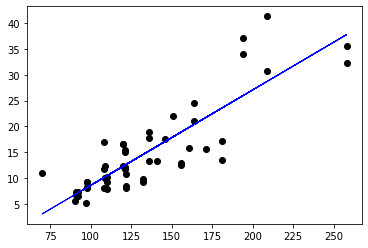

In [ ]:
plt.scatter(X_test,  y_test,  color='black')
plt.plot(X_test, test_df['Predicted_test_price'], color='blue', linewidth=1)
plt.xticks()
plt.yticks()
plt.show()

21. Evaluate the regression model you created using the three methods:

>1. Residual analysis
2. Cost function
3. R2




In [ ]:
#1 Residual analysis

train_df['residuals'] = train_df['priceK'] - train_df['Predicted_train_price']
test_df['residuals'] = test_df['priceK'] - test_df['Predicted_test_price']


In [ ]:
#plot the residuals graph
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=train_df['priceK'],
        y=train_df['residuals'],
        mode='markers',
        marker_color='blue',
        marker_size=2.5,
        name='train residuals'
        ))
fig.add_trace(go.Scatter(
        x=test_df['priceK'],
        y=test_df['residuals'],
        mode='markers',
        marker_color='red',
        marker_size=2.5,
        name='test residuals'
        ))
fig.add_trace(
  go.Scatter(
      x=train_df['priceK'],
      y=0*train_df['residuals'],
      mode='lines',
      name='zero line',
      marker_color='black',
      marker_size=1.5,
      marker_line_width=0,

  )
)
fig.update_layout(
    title="Residuals of Predicted prices",
    xaxis_title="Predicted Price",
    yaxis_title="Residuals",
    font=dict(
        size=14,
        color="RebeccaPurple"
    )
)
fig.show()

Write your inference here:

.....


In [ ]:
#try to get similar or even better results
from sklearn import metrics

print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(train_df.priceK, train_df.Predicted_train_price))
print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.priceK, train_df.Predicted_train_price)))
print("MAE:",metrics.mean_absolute_error(train_df.priceK, train_df.Predicted_train_price))

print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(test_df.priceK, test_df.Predicted_test_price))
print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.priceK, test_df.Predicted_test_price)))
print("MAE:",metrics.mean_absolute_error(test_df.priceK, test_df.Predicted_test_price))

------ TRAIN DATA ------
MSE: 13.313256019834858
RMSE: 3.648733481611785
MAE: 2.6687068128090603
------ TEST DATA ------
MSE: 19.33564885384586
RMSE: 4.397231953609664
MAE: 3.250738853031474


In [ ]:
#3
# get R2 for train set
from sklearn.metrics import r2_score
r2_score(train_df.priceK, train_df.Predicted_train_price)


0.7750532615472773

In [ ]:
#get R2 for test set
r2_score(test_df.priceK, test_df.Predicted_test_price)

0.7339353077649318

22. Conclusions:
* How well does the model perform?
* What can you do to increase the predictability of the model?

In [ ]:
"""The model did not perform well, error values were high compared to the actual values. 

We can improve the results by changing the model to a MLR and using more features from the data, such as curbweight, enginesize, horsepower, citympg, highwaympg.
We can further improve the results by using additional features which are currently textual and need to be converted to numeric, e.g. carbody, drivewheel, enginetype.
"""

'The model did not perform well, error values were high compared to the actual values. \n\nWe can improve the results by changing the model to a MLR and using more features from the data, such as curbweight, enginesize, horsepower, citympg, highwaympg.\nWe can further improve the results by using additional features which are currently textual and need to be converted to numeric, e.g. carbody, drivewheel, enginetype.\n'